In [87]:
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .appName("London Crime") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()

data = spark.read\
            .format("csv")\
            .option("header", "true")\
            .load("datasets/london_crime_by_lsoa.csv")   


In [4]:
data.printSchema()

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)



In [5]:
data.count()

13490604

In [6]:
data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



In [7]:
data.dropna().count()

13490604

In [8]:
data.show()

+---------+--------------------+--------------------+--------------------+-----+----+-----+
|lsoa_code|             borough|      major_category|      minor_category|value|year|month|
+---------+--------------------+--------------------+--------------------+-----+----+-----+
|E01001116|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|          Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
|E01001320|              Ealing|  Theft and Handling|         Other Theft|    0|2012|    5|
|E01001342|              Ealing|Violence Against ...|    Offensive Weapon|    0|2010|    7|
|E01002633|            Hounslow|             Robbery|   Personal Property|    0|

In [9]:
data.where(data.major_category.contains("Sex"))\
    .show()

+---------+--------------------+---------------+--------------+-----+----+-----+
|lsoa_code|             borough| major_category|minor_category|value|year|month|
+---------+--------------------+---------------+--------------+-----+----+-----+
|E01002740|           Islington|Sexual Offences|  Other Sexual|    0|2016|   10|
|E01000562|               Brent|Sexual Offences|          Rape|    0|2012|   12|
|E01001646|           Greenwich|Sexual Offences|          Rape|    0|2013|    5|
|E01003120|             Lambeth|Sexual Offences|          Rape|    0|2014|    3|
|E01004757|         Westminster|Sexual Offences|  Other Sexual|    0|2012|    7|
|E01004740|         Westminster|Sexual Offences|          Rape|    0|2010|   10|
|E01002782|           Islington|Sexual Offences|  Other Sexual|    0|2010|    9|
|E01003631|              Newham|Sexual Offences|          Rape|    0|2015|    5|
|E01004552|          Wandsworth|Sexual Offences|  Other Sexual|    0|2015|   12|
|E01003404|              Mer

In [10]:
slim_data = data.drop("lsoa_code")

slim_data.show(5)

+----------+--------------------+--------------------+-----+----+-----+
|   borough|      major_category|      minor_category|value|year|month|
+----------+--------------------+--------------------+-----+----+-----+
|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+----------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [11]:
boroughs = data.select("borough")\
                .distinct()\
                .count()
boroughs


33

In [12]:
sex_in_2015_2016 = data\
                    .where(data.major_category.contains("Sex") & data.year.isin(2015, 2016))

print(f"Total count = {sex_in_2015_2016.count()}")
sex_in_2015_2016.sample(fraction=0.1).show()


Total count = 24024
+---------+--------------+---------------+--------------+-----+----+-----+
|lsoa_code|       borough| major_category|minor_category|value|year|month|
+---------+--------------+---------------+--------------+-----+----+-----+
|E01002216|        Harrow|Sexual Offences|          Rape|    0|2015|    5|
|E01003186|       Lambeth|Sexual Offences|          Rape|    0|2015|    7|
|E01001427|       Enfield|Sexual Offences|  Other Sexual|    0|2015|   12|
|E01002781|     Islington|Sexual Offences|  Other Sexual|    0|2015|    5|
|E01002182|        Harrow|Sexual Offences|  Other Sexual|    0|2016|    3|
|E01004754|   Westminster|Sexual Offences|  Other Sexual|    0|2015|   12|
|E01003783|     Redbridge|Sexual Offences|  Other Sexual|    0|2016|    8|
|E01004337|Waltham Forest|Sexual Offences|          Rape|    0|2016|   10|
|E01000919|        Camden|Sexual Offences|  Other Sexual|    0|2015|    9|
|E01001779|       Hackney|Sexual Offences|  Other Sexual|    0|2016|    3|
|E010

In [13]:
crimes_per_borough = data.groupBy("borough").count().orderBy("count", ascending=False)
crimes_per_borough.show(5)

crimes_per_borough = crimes_per_borough.orderBy("count", ascending=True)
crimes_per_borough.show(5)
                            

+-------+------+
|borough| count|
+-------+------+
|Croydon|602100|
| Barnet|572832|
| Ealing|549396|
|Bromley|523908|
|Lambeth|519048|
+-------+------+
only showing top 5 rows

+--------------------+------+
|             borough| count|
+--------------------+------+
|      City of London|  9720|
|Kingston upon Thames|259524|
|Kensington and Ch...|296784|
|Richmond upon Thames|304128|
|Barking and Dagenham|311040|
+--------------------+------+
only showing top 5 rows



In [14]:
borough_conviction_sum_per_borough = data.groupBy("borough")\
                                .agg({"value": "sum"})\
                                .withColumnRenamed("sum(value)", "convictions")

borough_conviction_sum_per_borough.show(5)

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|   260294.0|
|          Wandsworth|   204741.0|
|              Bexley|   114136.0|
|             Lambeth|   292178.0|
|Barking and Dagenham|   149447.0|
+--------------------+-----------+
only showing top 5 rows



In [15]:
total_convictions = borough_conviction_sum_per_borough.agg({"convictions": "sum"})\
                                                        .withColumnRenamed("sum(convictions)", "Total")
total_convictions.show()

total = total_convictions.collect()[0][0]
print(f"Total convictions = {total}")



+---------+
|    Total|
+---------+
|6447758.0|
+---------+

Total convictions = 6447758.0


In [19]:
import pyspark.sql.functions as func

borough_contribution_pct = borough_conviction_sum_per_borough.withColumn(
                                "% contibution",
                                func.round(borough_conviction_sum_per_borough.convictions / total * 100, 2))
                                

borough_contribution_pct\
                        .orderBy(borough_contribution_pct.convictions.desc())\
                        .orderBy(borough_contribution_pct[0].asc())\
                        .orderBy("% contibution", ascending=False)\
                        .show(5)

+-----------+-----------+-------------+
|    borough|convictions|% contibution|
+-----------+-----------+-------------+
|Westminster|   455028.0|         7.06|
|    Lambeth|   292178.0|         4.53|
|  Southwark|   278809.0|         4.32|
|     Camden|   275147.0|         4.27|
|     Newham|   262024.0|         4.06|
+-----------+-----------+-------------+
only showing top 5 rows



In [20]:
convictions_by_month_in_2014 = data.where(data.year == 2014)\
                                    .groupBy("month")\
                                    .agg({"value": "sum"})\
                                    .withColumnRenamed("sum(value)", "monthly_convictions")\
                                    

convictions_by_month_in_2014.orderBy(convictions_by_month_in_2014.monthly_convictions.desc())\
                            .show()




+-----+-------------------+
|month|monthly_convictions|
+-----+-------------------+
|   10|            60537.0|
|   11|            59704.0|
|    7|            58564.0|
|    3|            57669.0|
|   12|            57565.0|
|    6|            57039.0|
|    9|            56933.0|
|    5|            56327.0|
|    8|            55641.0|
|    1|            55515.0|
|    4|            53467.0|
|    2|            51222.0|
+-----+-------------------+



In [33]:
import pyspark.sql.functions as func

total_convictions = data.agg({"value": "sum"}).collect()[0][0]
print(f"Total convictions # = {total_convictions}")

convictions_per_major_category = data.groupBy("major_category")\
                                        .agg({"value": "sum"})\
                                        .withColumnRenamed("sum(value)", "total_convictions_per_major_category")

convictions_per_major_category\
                        .withColumn("convictions %", 
                                    func.round(convictions_per_major_category.total_convictions_per_major_category / total_convictions * 100, 2))\
                        .orderBy(convictions_per_major_category.total_convictions_per_major_category.desc())\
                        .show()



Total convictions # = 6447758.0
+--------------------+------------------------------------+-------------+
|      major_category|total_convictions_per_major_category|convictions %|
+--------------------+------------------------------------+-------------+
|  Theft and Handling|                           2661861.0|        41.28|
|Violence Against ...|                           1558081.0|        24.16|
|            Burglary|                            754293.0|         11.7|
|     Criminal Damage|                            630938.0|         9.79|
|               Drugs|                            470765.0|          7.3|
|             Robbery|                            258873.0|         4.01|
|Other Notifiable ...|                            106349.0|         1.65|
|    Fraud or Forgery|                              5325.0|         0.08|
|     Sexual Offences|                              1273.0|         0.02|
+--------------------+------------------------------------+-------------+



In [35]:
year_df = data.select(data.year)

year_from = year_df.agg({"year": "min"}).collect()[0][0]
year_to = year_df.agg({"year": "max"}).collect()[0][0]

print(f"From {year_from} to {year_to}")


From 2008 to 2016


In [37]:
year_df.describe().show()

+-------+-----------------+
|summary|             year|
+-------+-----------------+
|  count|         13490604|
|   mean|           2012.0|
| stddev|2.581988993167432|
|    min|             2008|
|    max|             2016|
+-------+-----------------+



In [64]:
#data.crosstab("borough", "year")\
#    .show()

data.crosstab("borough", "major_category")\
    .select("borough_major_category","Burglary", "Drugs")\
    .show()

data.where((data.major_category == "Burglary") & (data.borough == "Havering"))\
    .agg({"value": "count"})\
    .withColumnRenamed("count(value)", "Total Burlglaries in Havering")\
    .show()


+----------------------+--------+-----+
|borough_major_category|Burglary|Drugs|
+----------------------+--------+-----+
|              Havering|   32400|32616|
|                Merton|   26784|29160|
|              Haringey|   31320|35424|
|         Tower Hamlets|   31104|37368|
|               Bromley|   42552|42336|
|               Enfield|   39528|44064|
|  Kingston upon Thames|   21168|22140|
|           Westminster|   27648|32616|
|  Richmond upon Thames|   24840|23004|
|              Lewisham|   36504|43740|
|                 Brent|   37368|46980|
|  Barking and Dagenham|   23760|26244|
|             Redbridge|   34776|36504|
|             Islington|   26568|34128|
|               Hackney|   31104|38772|
|                Newham|   35424|41580|
|        City of London|     540|  756|
|                Sutton|   26136|26784|
|             Southwark|   35856|45144|
|                Harrow|   29592|31212|
+----------------------+--------+-----+
only showing top 20 rows

+-------------

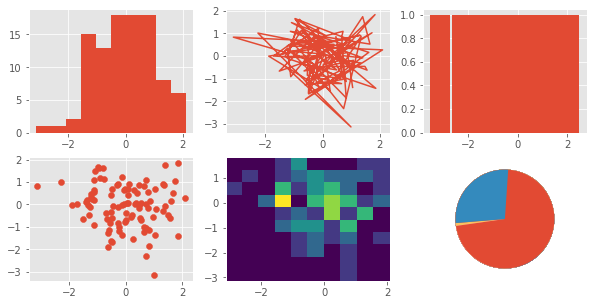

In [86]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
plot_data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 3, figsize=(10, 5))
axs[0, 0].hist(plot_data[0])
axs[1, 0].scatter(plot_data[0], plot_data[1])
axs[0, 1].plot(plot_data[0], plot_data[1])
axs[1, 1].hist2d(plot_data[0], plot_data[1])
axs[0, 2].bar(plot_data[0], 1)
axs[1, 2].pie(plot_data[0])

plt.style.use("ggplot")
plt.show()



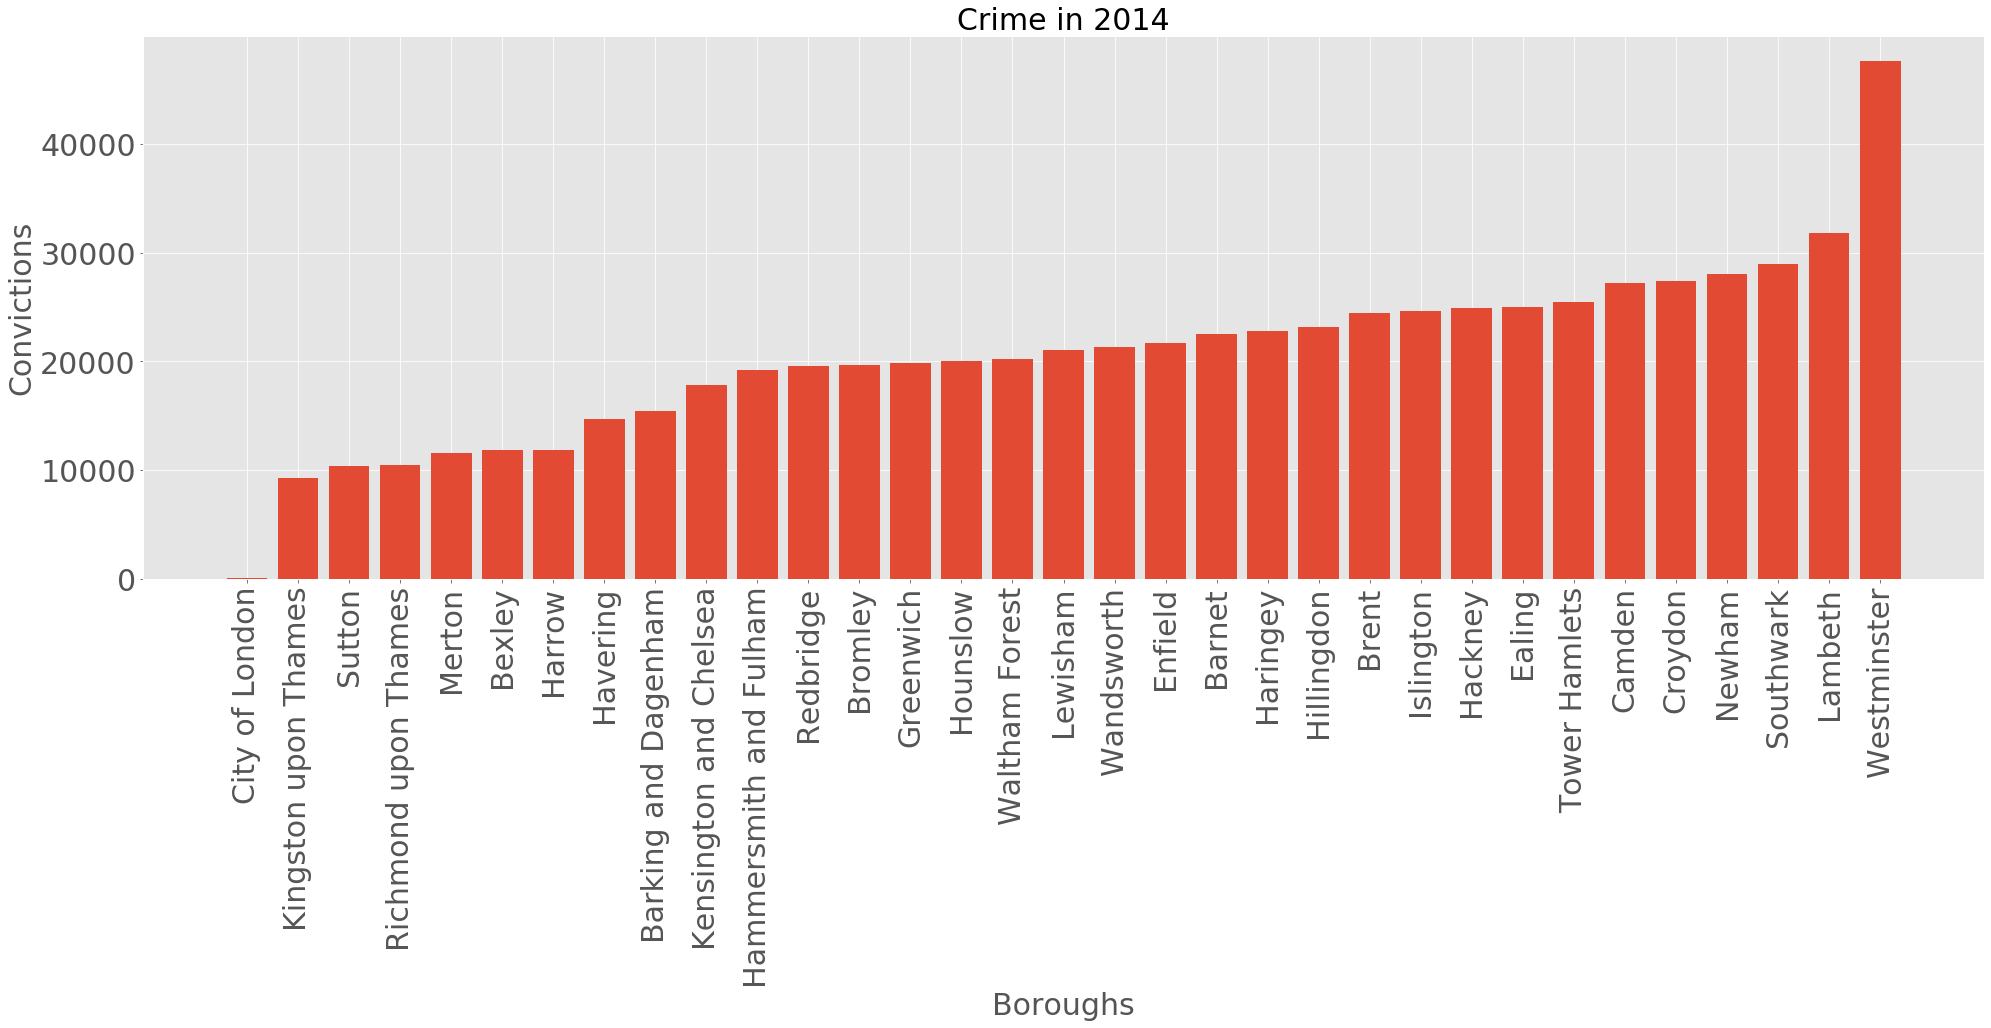

In [115]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

df = data.drop("lsoa_code", "major_category", "minor_category", "month")

def plot_year(year):
    convictions_per_borough_in_year = df.where(df.year == year)\
                                            .groupBy("borough")\
                                            .agg({"value": "sum"})\
                                            .orderBy("sum(value)")\
                                            .withColumnRenamed("sum(value)", "Convictions in " + str(year))
    
    borough_list = [_[0] for _ in convictions_per_borough_in_year.toLocalIterator()]
    convictions_list = [_[1] for _ in convictions_per_borough_in_year.toLocalIterator()]
    
    plt.figure(figsize=(33, 10))
    plt.title("Crime in " + str(year), fontsize=30)
    plt.xlabel("Boroughs", fontsize=30)
    plt.xticks(rotation=90, fontsize=30)
    plt.ylabel("Convictions", fontsize=30)
    plt.yticks(fontsize=30)
    plt.autoscale()
    
    plt.bar(borough_list, convictions_list)
    plt.show()
    
plot_year(2014)
